<a href="https://colab.research.google.com/github/Demidov-N/Machine-Learning-Conspect/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DataScienceProject/Loan_status_2007-2020Q3.gzip")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


Filter the data, and clean it: replace values, drop unnecessary columns

In [ ]:
filtered = data.loc[data["loan_status"].isin(
    ["Fully Paid", "Charged Off", "Default"]), "loan_amnt":]

filtered.loc[data.loan_status.isin(["Charged Off", "Default"]), "loan_status"] = "Unpaid"

defaulted = filtered[filtered["loan_status"] == "Default"]

filtered.loan_status.value_counts()

Fully Paid    357052
Unpaid         86403
Name: loan_status, dtype: int64

In [ ]:
filtered["verification_status"].value_counts()

Not Verified       156520
Verified           151941
Source Verified    134994
Name: verification_status, dtype: int64

In [ ]:
list(filtered.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_sta

# Employment Length Comparison

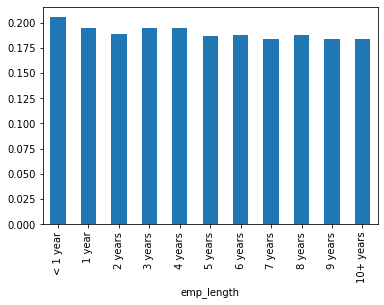

In [ ]:

def default_groups(grouping, g_data = filtered):
  def f(x):
    defaulted = x[x == "Unpaid"].count()
    return defaulted/x.count()

  

  grouped = g_data.groupby(grouping).aggregate(
      total_number = pd.NamedAgg(column = "loan_status", aggfunc = "count"),
      unpaid_number = pd.NamedAgg(column = "loan_status", 
                                   aggfunc = lambda x: x[x == "Unpaid"].count()))
  
  grouped["percent"] = grouped["unpaid_number"]/grouped["total_number"]

  
  return grouped

emp_length = default_groups(["emp_length"])

emp_length = emp_length.reindex(["< 1 year", "1 year", 
                                 "2 years", "3 years",
                                 "4 years", "5 years", 
                                 "6 years", "7 years",
                                 "8 years", "9 years", "10+ years"])
emp_length.percent.plot(kind = "bar")

# Installment Distributions

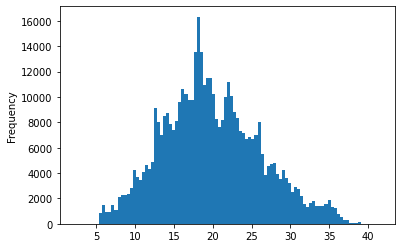

In [ ]:
import math



# Square Root Transformation
filtered.loc[:, "installment"].apply(math.sqrt).plot(kind = "hist", bins = 100)

Text(0.5, 1.0, 'Distribution of Installment Amounts')

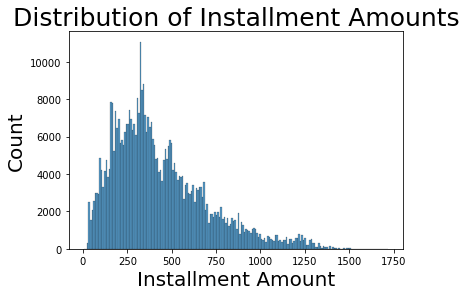

In [ ]:
installment_histplot = sns.histplot(filtered.loc[:, "installment"])

installment_histplot.set_xlabel("Installment Amount", fontsize = 20)
installment_histplot.set_ylabel("Count", fontsize = 20)
installment_histplot.set_title("Distribution of Installment Amounts", fontsize = 25)

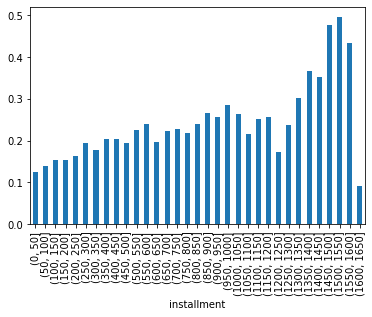

In [ ]:
inst_bins = [i for i in range(0, 1700, 50)]
inst_grouped = default_groups(pd.cut(filtered.installment, inst_bins))

inst_grouped.percent.plot(kind = "bar")

# Employment Status

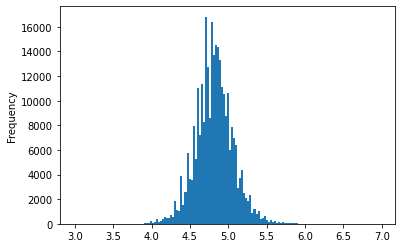

In [ ]:
# annual_inc

verified = filtered[filtered["verification_status"] != "Not Verified"]


verified_transformed = verified.annual_inc.apply(lambda x : math.log10(1 + x))
verified_transformed = verified_transformed[verified_transformed.between(3, 7)]
verified_transformed.plot(kind="hist", bins = 150)


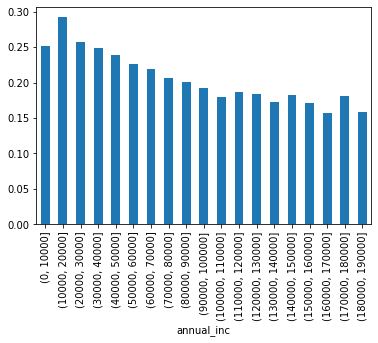

In [ ]:
inc_bins = [i for i in range(0, 200000, 10000)]

inc_grouped = default_groups(pd.cut(verified.annual_inc, inc_bins), g_data = verified)

inc_grouped.percent.plot(kind = "bar")

Is that normal, or did I make the function wrong?

# Purpose

In [ ]:
filtered.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [ ]:
purpose_grouped = default_groups("purpose")

purpose_grouped

,total_number,unpaid_number,percent
purpose,,,
car,6096,825,0.135335
credit_card,92577,15395,0.166294
debt_consolidation,246333,50170,0.203667
educational,326,56,0.171779
home_improvement,29291,5153,0.175924
house,3928,852,0.216904
major_purchase,11863,2191,0.184692
medical,5723,1212,0.211777
moving,3387,763,0.225273


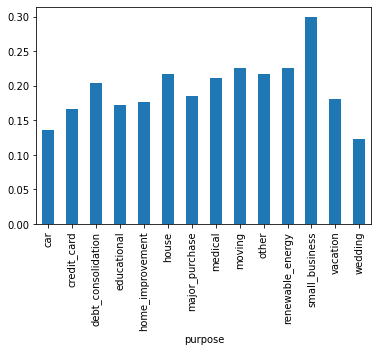

In [ ]:
purpose_grouped.percent.plot(kind = "bar")

The majority goes to big loans, like vacation, car, credit card, house. Small things like education, medical and moving have very little percentage.

# FICO Average

In [ ]:
# Average FICO Score, based on max + min / 2

filtered["fico_avg"] = (filtered["fico_range_high"] + filtered["fico_range_low"])/2

filtered

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,fico_avg
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,737.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,742.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,737.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,692.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620488,8000.0,8000.0,8000.0,36 months,16.46%,283.08,C,C5,Lead Medical Assistant,4 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,707.0
620492,24000.0,24000.0,24000.0,36 months,6.19%,732.20,A,A2,Veterinarian,5 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,742.0
620493,5200.0,5200.0,5200.0,36 months,9.58%,166.77,B,B1,Data Center Engineer,3 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,672.0
620495,8000.0,8000.0,8000.0,36 months,24.84%,317.41,E,E3,Education Abroad Assistant,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,667.0


Text(0.5, 1.0, 'Distribution of Average FICO Score')

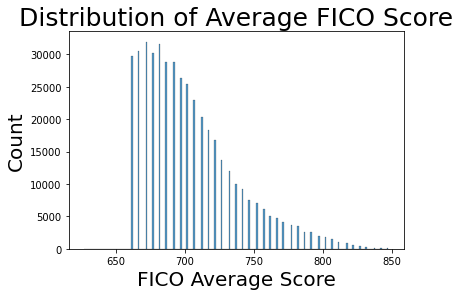

In [ ]:

fico_hist = sns.histplot(filtered["fico_avg"])
fico_hist.set_xlabel("FICO Average Score", fontsize = 20)
fico_hist.set_ylabel("Count", fontsize = 20)
fico_hist.set_title("Distribution of Average FICO Score", fontsize = 25)

Text(0.5, 1.0, 'Percent of Unpaid Loans Across Several FICO Scores')

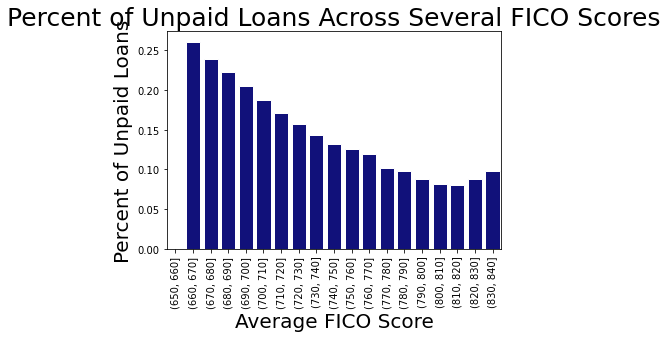

In [ ]:
fico_groups = [i for i in range(650, 850, 10)]

fico_default = default_groups(pd.cut(filtered.fico_avg, fico_groups))

fico_default.percent.plot(kind = "bar")

sns.set(font_scale = 1.5)
fico_barplot = sns.barplot(x="fico_avg", y = "percent", data = fico_default.reset_index(), color = "darkblue")
fico_barplot.set_xlabel("Average FICO Score", fontsize = 20)
fico_barplot.set_ylabel("Percent of Unpaid Loans", fontsize = 20)
fico_barplot.set_title("Percent of Unpaid Loans Across Several FICO Scores", fontsize = 25)

# Verification Status
How verification status is going to change the outcome? Is verification status impact the charged offs?

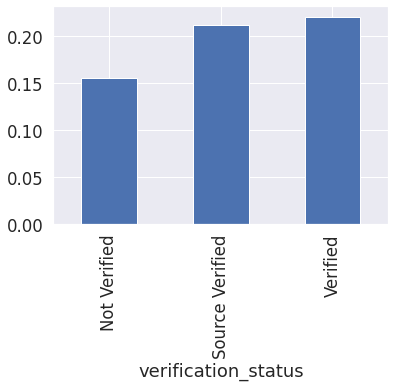

In [ ]:
verified_default = default_groups("verification_status")

verified_default.percent.plot(kind = "bar")



What is happening with verified? Lets see closer, what are the differences between verified , source verified, and unverified

In [ ]:


(data.groupby("verification_status")
.aggregate({
    "fico_range_low": "mean",
    "fico_range_high": "mean",
    "installment": "mean",
    "annual_inc": "mean"
}))

,fico_range_low,fico_range_high,installment,annual_inc
verification_status,,,,
Not Verified,708.595177,712.595476,358.991449,69737.010373
Source Verified,699.854603,703.854862,455.844249,82489.387372
Verified,699.109987,703.110185,520.250495,77104.645839


In [ ]:
fico_groups = [i for i in range(650, 850, 10)]

fico_default = default_groups(["verification_status", pd.cut(filtered.fico_avg, fico_groups)])

fico_default.reset_index()

,verification_status,fico_avg,total_number,unpaid_number,percent
0,Not Verified,"(650, 660]",0,NaN,NaN
1,Not Verified,"(660, 670]",18106,3966.0,0.219043
2,Not Verified,"(670, 680]",19456,3875.0,0.199167
3,Not Verified,"(680, 690]",19356,3527.0,0.182217
4,Not Verified,"(690, 700]",17888,2977.0,0.166424
5,Not Verified,"(700, 710]",16617,2602.0,0.156587
6,Not Verified,"(710, 720]",13878,1956.0,0.140942
7,Not Verified,"(720, 730]",12128,1669.0,0.137615
8,Not Verified,"(730, 740]",9166,1082.0,0.118045
9,Not Verified,"(740, 750]",7205,806.0,0.111867


[Text(0, 0, '(650, 660]'),
 Text(0, 0, '(660, 670]'),
 Text(0, 0, '(670, 680]'),
 Text(0, 0, '(680, 690]'),
 Text(0, 0, '(690, 700]'),
 Text(0, 0, '(700, 710]'),
 Text(0, 0, '(710, 720]'),
 Text(0, 0, '(720, 730]'),
 Text(0, 0, '(730, 740]'),
 Text(0, 0, '(740, 750]'),
 Text(0, 0, '(750, 760]'),
 Text(0, 0, '(760, 770]'),
 Text(0, 0, '(770, 780]'),
 Text(0, 0, '(780, 790]'),
 Text(0, 0, '(790, 800]'),
 Text(0, 0, '(800, 810]'),
 Text(0, 0, '(810, 820]'),
 Text(0, 0, '(820, 830]'),
 Text(0, 0, '(830, 840]')]

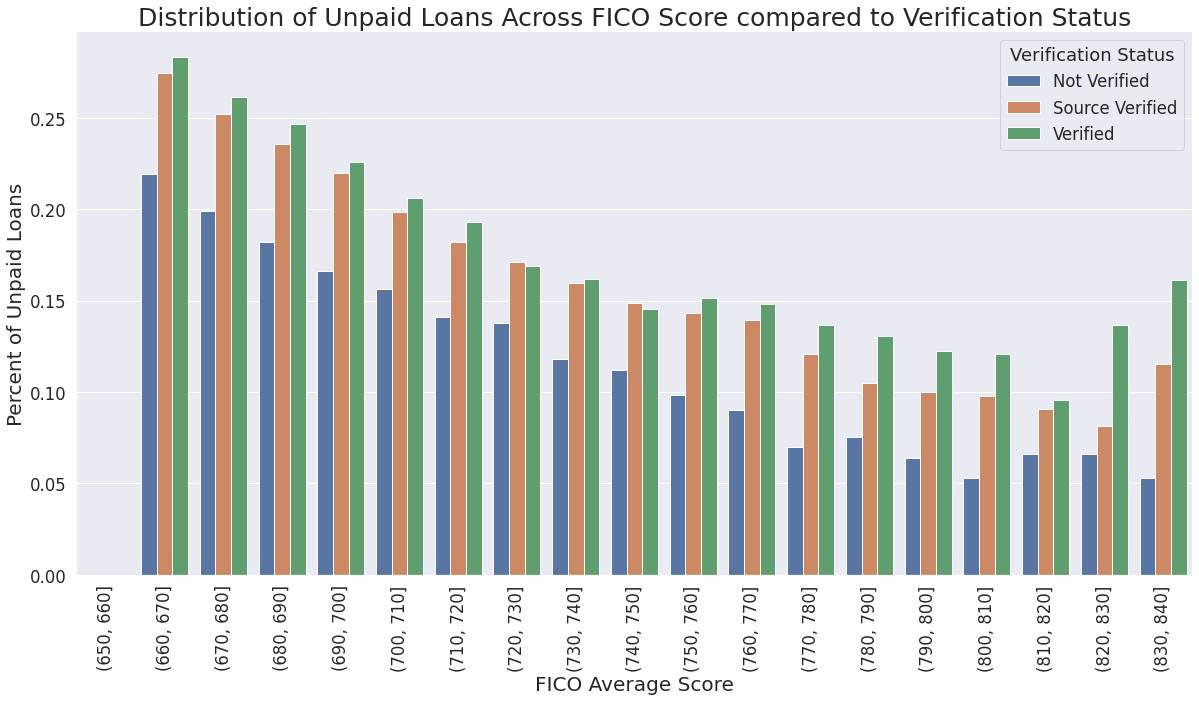

In [ ]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (20, 10)
bp = sns.barplot(x = "fico_avg", y = "percent", data = fico_default.reset_index(), hue = "verification_status")

bp.set_xlabel("FICO Average Score", fontsize = 20)
bp.set_ylabel("Percent of Unpaid Loans", fontsize = 20)
bp.set_title("Distribution of Unpaid Loans Across FICO Score compared to Verification Status", fontsize = 25)
bp.legend(title = "Verification Status")

bp.set_xticklabels(bp.get_xticklabels(), rotation=90, horizontalalignment='center')

In [ ]:

sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips")

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Feature Engineering: things to do:
- filter the values
- repalce empty values
- Impute Categorical Values
- Scale down numerical values

# Modelling

## Part 1: Transformation and Modeling

I am going to create a transformation pipeline, which is going to impute empty values, select variables we are planning to keep, transform categorical values into label or one-hot encoders

Specifically for SVM, I will scale the values using standard scaling

In [ ]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
data.loc[data["loan_status"].isin(["Charged Off", "Default"]),"loan_status"] = "Unpaid"

filtered = data.loc[data["loan_status"].isin(["Fully Paid", "Unpaid"])]

Add FICO Average and Monthly load column, transform year to numerical value

In [ ]:
filtered["fico_avg"] = (filtered["fico_range_high"] + filtered["fico_range_low"])/2
filtered['monthly_load'] = filtered.apply(
    lambda r: ((r.installment * 12) / r.annual_inc) * 100 if r.annual_inc != 0 else -1, 
    axis=1)

filtered['year'] = pd.to_datetime(filtered['issue_d']).dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [ ]:
numeric_columns = [
                   "loan_amnt","pub_rec","mths_since_last_major_derog","tot_cur_bal",
                   "open_acc_6m","open_act_il","open_il_12m","mths_since_rcnt_il","total_bal_il",
                   "il_util","open_rv_12m","max_bal_bc","total_cu_tl","bc_util",
                   "mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op",
                   "mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc","mths_since_recent_revol_delinq",
                   "num_actv_rev_tl","num_il_tl","pct_tl_nvr_dlq","pub_rec_bankruptcies", "fico_avg", 
                   "monthly_load", "year"
]

one_hot_columns = ["term","purpose","initial_list_status"]

label_columns = ["sub_grade", "home_ownership", "addr_state"]

interest_column = ["int_rate"]

emp_length = ["emp_length"]

earliest_cr_line = ["earliest_cr_line"]

log_transform = ["annual_inc", "open_acc"]


columns = (numeric_columns + emp_length + 
           earliest_cr_line + interest_column + 
           log_transform +
           label_columns + one_hot_columns + ["dti"])


len(columns)

40

My preprocessing was the following:
1. I split up all the data in the categories of transformation, because they are partly related. 
  - Numerical values, for them based on our feature engineering we decided to replace missing values with 0s, most of the missing data worked perfectly with that
  - Categorical columns we decided to be a one-hot encoders, or ordinal label encoders. They are represented by lists `one_hot_columns` and `label_columns`
  - Interest needed to remove percent value
  - **Employment Length** needed to be comverted to the numerical instead of string
  - **Earliest credit line** also needed to be transformed to numerical, we decided to use year
  - **Annual Income** and **Opened Accounts** needed to be log_transformed

In [ ]:
def clean_cr_line(i):
  if isinstance(i, str):
    return int(i.split("-")[1])
  else:
    return 0
  
def clean_emp_length(i):
  if isinstance(i, str):
    x = i.split(" ")[0]
    if x == "10+":
      return 11
    elif x == "<":
      return 0
    else:
      return int(x)
  else:
    return 0

def clean_int_rate(i):
  if isinstance(i, str):
    x = float(i.split("%")[0])
    return x
  else:
    return 0

prepros_transformer = ColumnTransformer(
    [("fill_zeros", SimpleImputer(strategy="constant", fill_value = 0.0), numeric_columns),
     ("emp_length_transformer", FunctionTransformer(func = lambda x: np.vectorize(clean_emp_length)(x)), emp_length),
     ("clean_credit_line", FunctionTransformer(func = lambda x: np.vectorize(clean_cr_line)(x)), earliest_cr_line), 
     ("clean_int_rate", FunctionTransformer(func = lambda x: np.vectorize(clean_int_rate)(x)), interest_column), 
     ("log_transform", FunctionTransformer(func = lambda x: np.log1p(x+1)), log_transform),
     ("label_transform", OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1), label_columns),
     ("one_hot_transform", OneHotEncoder(handle_unknown = 'ignore'), one_hot_columns),
     ("dti_median_imputer", SimpleImputer(strategy = "median"), ["dti"])])



## Modeling

First split up the model into train test. Fit transformer on train, transform both train and test

In [ ]:
from sklearn.model_selection import train_test_split

x = filtered.drop("loan_status", axis = 1)
y = filtered["loan_status"]

y = y.map({"Fully Paid" : 0, "Unpaid" : 1})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
y_train.dtype

dtype('int64')

Undersample, to get better results, as there is a class imbalance

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDOneClassSVM

svm_clf = Pipeline([
        ("preprocessing", prepros_transformer),
        ("scaler", StandardScaler()),
        ("svc_model", SGDOneClassSVM(nu = 1e-1))
        # ("svc_model", LinearSVC(C = 1e-1))
])

Takes lots of time, lets recreate and train on small samples, and then aggregate the classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier


n_estimators = 1



svm_clf = Pipeline([
        ("preprocessing", prepros_transformer),
        ("scaler", StandardScaler()),
        ("svc_model", BaggingClassifier(SGDClassifier(loss = "hinge"),
                                        n_estimators = 10, n_jobs = -1))                 
])

In [ ]:
svm_clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('fill_zeros',
                                                  SimpleImputer(fill_value=0.0,
                                                                strategy='constant'),
                                                  ['loan_amnt', 'pub_rec',
                                                   'mths_since_last_major_derog',
                                                   'tot_cur_bal', 'open_acc_6m',
                                                   'open_act_il', 'open_il_12m',
                                                   'mths_since_rcnt_il',
                                                   'total_bal_il', 'il_util',
                                                   'open_rv_12m', 'max_bal_bc',
                                                   'total_cu_tl', 'bc_util',
                                                   'mo_sin_old_il_...
                                       

In [ ]:
from sklearn.metrics import classification_report

x_pred = svm_clf.predict(x_test)

In [ ]:
print(classification_report(y_test, x_pred))

              precision    recall  f1-score   support

           0       0.88      0.66      0.76     71399
           1       0.32      0.64      0.42     17292

    accuracy                           0.66     88691
   macro avg       0.60      0.65      0.59     88691
weighted avg       0.77      0.66      0.69     88691



In [ ]:
print('''Original Version: \n
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     71399
           1       0.32      0.64      0.42     17292

    accuracy                           0.66     88691
   macro avg       0.60      0.65      0.59     88691
weighted avg       0.77      0.66      0.69     88691''')

Original Version: 

              precision    recall  f1-score   support

           0       0.88      0.67      0.76     71399
           1       0.32      0.64      0.42     17292

    accuracy                           0.66     88691
   macro avg       0.60      0.65      0.59     88691
weighted avg       0.77      0.66      0.69     88691


Test on Cross Validation

In [ ]:
from 
print(auc_roc_score(y_test, x_pred))

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

scores = cross_val_score(svm_clf, x, y, scoring = "roc_auc")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


KeyboardInterrupt: ignored

In [ ]:
scores.mean()

Lets fine tune the model to achieve the best performance

In [ ]:
from sklearn.model_selection import learning_curve

lc = learning_curve(svm_clf, x, y, scoring = "roc_auc", train_sizes = np.linspace(0.1, 1, 10), n_jobs = -1)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
sample_sizes = lc[0]
train_val = lc[1]
test_val = lc[2]

train_means = [i.mean() for i in train_val]
test_means = [i.mean() for i in test_val]

lc_plot = plt.figure(figsize=(10, 8))

lc_plot.title("ROC_AUC Score for Different Sample Sizes")
lc_plot.plot(sample_size, train_means, 'g', "ROC_AUC Score Test")
lc_plot.plot(sample_size, test_means, 'b', "ROC_AUC SCORE Train")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.model_selection import GridSearchCV

c_params = {"svc_model__base_estimator__C": np.linspace(1e-4, 1e-6, 5)}

gs = GridSearchCV(svm_clf, c_params, scoring = "roc_auc", n_jobs = -1)

In [ ]:
gs_result = gs.fit(x, y)

In [ ]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, roc_curve, auc

fpr1, tpr1, threshold1 = roc_curve(y_test, x_pred)
roc_auc1 = auc(fpr1, tpr1)


x_pred_train = svm_clf.predict(x_train)
fpr2, tpr2, threshold2 = roc_curve(y_train, x_pred_train)

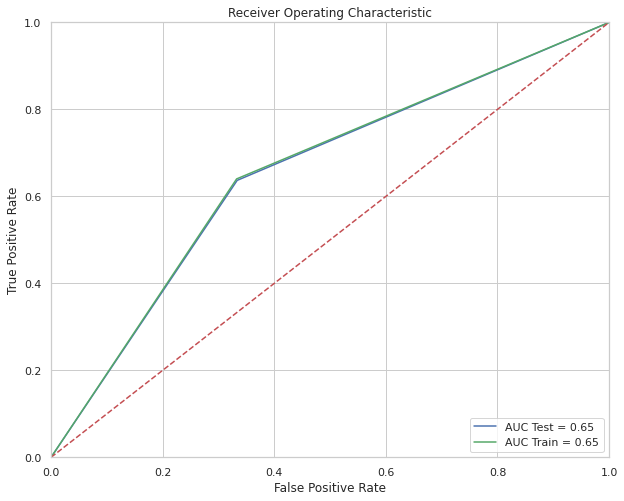

In [ ]:
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(10, 8))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC Test = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC Train = %0.2f' % roc_auc2)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

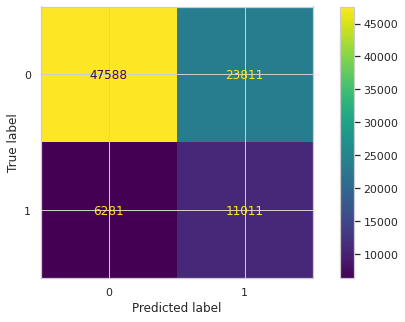

In [ ]:
plt.rcParams["figure.figsize"] = (10, 5)
conf_matrix = ConfusionMatrixDisplay.from_estimator(svm_clf, x_test, y_test)

In [ ]:
gs_result.cv_results_

NameError: ignored

In [ ]:
sample_sizes = lc[0]
train_val = lc[1]
test_val = lc[2]

test_means = [i.mean() for i in test_val]

test_means